In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('../data/CreditScoring.csv')
len(df)

4455

In [3]:
df.head()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [4]:
df.columns = df.columns.str.lower()

In [5]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


We can see that the DataFrame has the following columns:
- **status**: whether the customer managed to pay back the loan (1) or not (2)
- **seniority**: job experience in years
- **home**: type of homeownership: renting (1), a homeowner (2), and others
- **time**: period planned for the loan (in months)
- **age**: age of the client
- **marital [status]**: single (1), married (2), and others
- **records**: whether the client has any previous records: no (1), yes (2) (It’s not clear from the dataset description what kind of records we have in this column. For the purposes of this project, we may assume that it’s about records in the bank’s database.)
- **job**: type of job: full-time (1), part-time (2), and others
- **expenses**: how much the client spends per month
- **income**: how much the client earns per month
- **assets**: total worth of all the assets of the client
- **debt**: amount of credit debt
- **amount**: requested amount of the loan
- **price**: price of an item the client wants to buy


### Clean data

In [6]:
status_values = {
1: 'ok',
2: 'default',
0: 'unk'
}
home_values = {
1: 'rent',
2: 'owner',
3: 'private',
4: 'ignore',
5: 'parents',
6: 'other',
0: 'unk'
}

marital_values = {
1: 'single',
2: 'married',
3: 'widow',
4: 'separated',
5: 'divorced',
0: 'unk'
}

records_values = {
1: 'no',
2: 'yes',
0: 'unk'
}

job_values = {
1: 'fixed',
2: 'parttime',
3: 'freelance',
4: 'others',
0: 'unk'
}

In [7]:
df.status = df.status.map(status_values)
df.home = df.home.map(home_values)
df.marital = df.marital.map(marital_values)
df.records = df.records.map(records_values)
df.job = df.job.map(job_values)
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910


In [8]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


In [9]:
for c in ['income', 'assets', 'debt']:
    df[c] = df[c].replace(to_replace=99999999, value=np.nan)

In [10]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4421.0,4408.0,4437.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,131.0,5403.0,343.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,86.0,11573.0,1246.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3000.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,165.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,959.0,300000.0,30000.0,5000.0,11140.0


In [11]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129.0,0.0,0.0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131.0,0.0,0.0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200.0,3000.0,0.0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182.0,2500.0,0.0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107.0,0.0,0.0,310,910


### EDA Exploratory data analysis

In [13]:
df.shape

(4455, 14)

In [12]:
## missing data
df.isnull().sum()

status        0
seniority     0
home          0
time          0
age           0
marital       0
records       0
job           0
expenses      0
income       34
assets       47
debt         18
amount        0
price         0
dtype: int64

There are missing data in the dataset. We have observed instances where certain fields do not contain any values

### Target

In [15]:
df.status.value_counts()

status
ok         3200
default    1254
unk           1
Name: count, dtype: int64

In [16]:
df = df[df.status !='unk']

In [17]:
df.status.value_counts()

status
ok         3200
default    1254
Name: count, dtype: int64

In [19]:
df.status.value_counts(normalize=True)*100

status
ok         71.845532
default    28.154468
Name: proportion, dtype: float64

<Axes: xlabel='status', ylabel='count'>

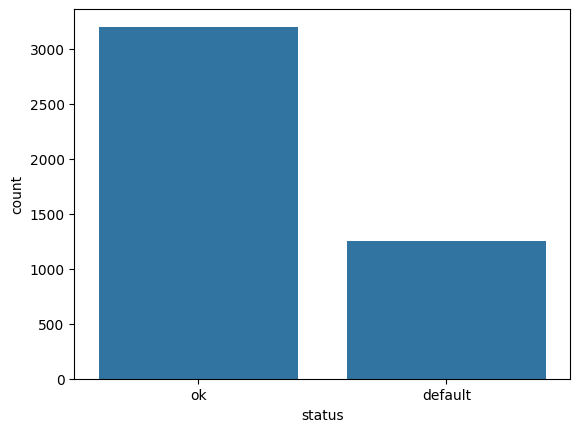

In [29]:
sns.countplot(data=df, x='status')

the dataset is imbalanced

### Feature importance analysis

In [20]:
df.columns

Index(['status', 'seniority', 'home', 'time', 'age', 'marital', 'records',
       'job', 'expenses', 'income', 'assets', 'debt', 'amount', 'price'],
      dtype='object')

In [23]:
df.dtypes.value_counts()

int64      6
object     5
float64    3
Name: count, dtype: int64

In [27]:
categorical = df.select_dtypes('object').columns
numerical = df.select_dtypes(exclude='object').columns
print('categorical is: ', categorical)
print('numerical is: ', numerical)

categorical is:  Index(['status', 'home', 'marital', 'records', 'job'], dtype='object')
numerical is:  Index(['seniority', 'time', 'age', 'expenses', 'income', 'assets', 'debt',
       'amount', 'price'],
      dtype='object')


#### Categorical

In [35]:
status_values = {
'ok':1,
'default':0}
df.status = df.status.map(status_values)

#### rate risk

In [36]:
df_group = df.groupby(by='job').status.agg(['mean'])
df_group

,mean
job,
fixed,0.793226
freelance,0.674805
others,0.602339
parttime,0.400442
unk,0.000000


In [37]:
global_mean  = df.status.mean()
global_mean

0.7184553210597217

In [39]:
from IPython.display import display
for col in categorical:
    df_group = df.groupby(by=col).status.agg(['mean'])
    df_group
    df_group['diff'] = df_group['mean'] - global_mean
    df_group['risk'] = df_group['mean']/ global_mean
    display(df_group)
    

,mean,diff,risk
status,,,
0,0.0,-0.718455,0.000000
1,1.0,0.281545,1.391875


,mean,diff,risk
home,,,
ignore,0.550000,-0.168455,0.765531
other,0.542320,-0.176136,0.754841
owner,0.814903,0.096447,1.134243
parents,0.702427,-0.016029,0.977690
private,0.658537,-0.059919,0.916601
rent,0.601233,-0.117222,0.836842
unk,0.333333,-0.385122,0.463958


,mean,diff,risk
marital,,,
divorced,0.631579,-0.086876,0.879079
married,0.744215,0.025759,1.035854
separated,0.507692,-0.210763,0.706644
single,0.664278,-0.054177,0.924593
unk,1.000000,0.281545,1.391875
widow,0.716418,-0.002037,0.997164


,mean,diff,risk
records,,,
no,0.775876,0.057421,1.079923
yes,0.445019,-0.273436,0.619411


,mean,diff,risk
job,,,
fixed,0.793226,0.074771,1.104072
freelance,0.674805,-0.043651,0.939244
others,0.602339,-0.116116,0.838381
parttime,0.400442,-0.318013,0.557366
unk,0.000000,-0.718455,0.000000
